# Working with MNIST Dataset and logistic regression with PyTorch

importing libraries

In [1]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [2]:
# Downloading dataset
train_dataset = MNIST(root='data/MNIST/train', train = True,download=True)
test_dataset = MNIST(root='data/MNIST/test', train = False,download=True)

In [3]:
len(train_dataset),len(test_dataset)

(60000, 10000)

The dataset has 60,000 images that we'll use to train the model. There is also additional test set of 10,000 images used for evaluation models and reporting metrics in papers and reports.

Sample dataset

In [4]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F3A7499DBA0>, 5)

It's a pair, consisting of a 28x28  px image and a label. The image is an object of class `PIL.Image.Image`, which is a part of the Python imaging library `Pillow`. We can view the image within notebook using `matplotlib`, teh de-facto plotting and graphing library for data science in Python

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement `%matplotlib inline` indicates to Jupyter that we want to pot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statement starting with `%` are called magic commands and are used to configure the behaviour of Jupyter itself.

Displaying of images from dataset

Label : 5


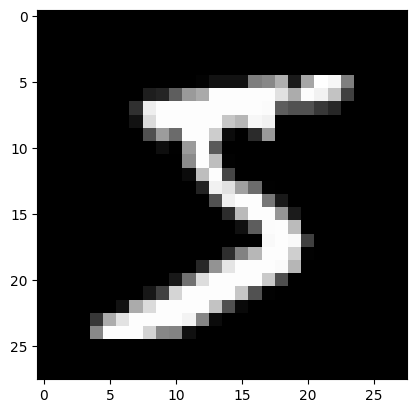

In [6]:
image, label = train_dataset[0]
plt.imshow(image,cmap='gray')
print(f'Label : {label}')

PyTorch don't know how to deal with images so we need to transfrom images to tensors

In [7]:
# loading transformed dataset
train_dataset = MNIST(root='data/MNIST/train', train = True,transform=transforms.ToTensor())
test_dataset = MNIST(root='data/MNIST/test', train = False,transform=transforms.ToTensor())

In [8]:
img_tensor, label = train_dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


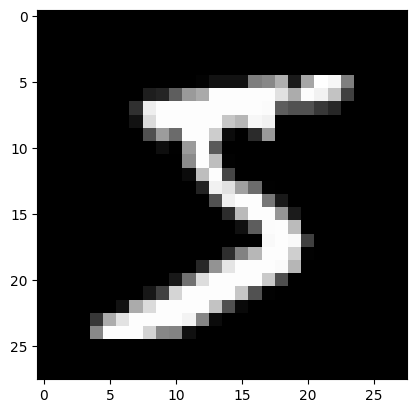

In [9]:
plt.imshow(img_tensor[0],cmap='gray')

## Training and validation Datasets

While building real-world machine learining models,it is quite common to split the dataset into three parts:

1. $\textbf{Training set -}$ used to train the model i.e., compute the loss and adjust the model's weights using gradient descent
2. $\textbf{validation set - }$ used to evaluate the model during training, adjust hyperparameters (learning rate, etc) and pick the best version of the model.
3. $\textbf{Test set -}$ used to compare different models or approaches and report the model's final accuracy

In [10]:
from torch.utils.data import random_split,DataLoader

train_ds , val_ds = random_split(train_dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

creating batches of training and validating dataset

In [11]:
batch_size = 128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

Now that we have prepared our data loaders, we can define our model. 

1. A logistic regression model is alomost identical to linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`).

2. As we did with linear regression, we can use `nn.Linear` t create the model instead of manually creating and initializing the matrices.

3. Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is flattened into a vector of size 784 `(28*28)` before being passed into the model.

4. The output for each image is a vecot of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability

In [12]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistis regression model
model = nn.Linear(input_size, num_classes)

In [13]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0220, -0.0340,  0.0036,  ..., -0.0063,  0.0326, -0.0022],
        [-0.0003, -0.0248,  0.0012,  ..., -0.0232, -0.0111,  0.0170],
        [-0.0189,  0.0191,  0.0101,  ...,  0.0038, -0.0311,  0.0041],
        ...,
        [-0.0151,  0.0070,  0.0248,  ..., -0.0241,  0.0121,  0.0188],
        [ 0.0251,  0.0095,  0.0353,  ...,  0.0137, -0.0112,  0.0024],
        [ 0.0300, -0.0125,  0.0160,  ...,  0.0123,  0.0214, -0.0199]],
       requires_grad=True)


In [14]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0195,  0.0355, -0.0246,  0.0241,  0.0171,  0.0280, -0.0279,  0.0003,
        -0.0076,  0.0204], requires_grad=True)


In [15]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)

    # reshaping images to (128,784) flattening
    images = images.reshape(128,784)
   
    outputs = model(images)
    print(outputs)
    break

tensor([7, 2, 4, 7, 8, 7, 6, 2, 0, 9, 6, 1, 7, 5, 5, 3, 7, 2, 4, 4, 0, 6, 1, 3,
        6, 3, 3, 1, 9, 4, 7, 6, 4, 5, 0, 9, 9, 6, 2, 2, 7, 0, 5, 6, 6, 5, 0, 5,
        5, 2, 1, 3, 2, 5, 7, 7, 5, 3, 2, 5, 2, 4, 3, 9, 3, 7, 8, 9, 5, 8, 6, 6,
        0, 5, 9, 9, 1, 3, 5, 7, 1, 3, 1, 1, 2, 7, 1, 5, 6, 0, 2, 5, 6, 3, 6, 4,
        6, 0, 7, 0, 3, 3, 6, 7, 2, 4, 0, 8, 7, 3, 1, 4, 3, 4, 7, 7, 4, 1, 1, 7,
        6, 3, 8, 0, 0, 1, 6, 8])
torch.Size([128, 1, 28, 28])
tensor([[ 0.1231,  0.1180,  0.1208,  ...,  0.2051,  0.0211,  0.0720],
        [ 0.2345,  0.0718, -0.0340,  ...,  0.0838, -0.2854,  0.2395],
        [-0.1181,  0.0826, -0.3208,  ..., -0.0630,  0.0104, -0.0629],
        ...,
        [ 0.3216, -0.0188, -0.0917,  ..., -0.1535, -0.2361, -0.0318],
        [ 0.3928,  0.1817, -0.2691,  ...,  0.1516, -0.0788,  0.1395],
        [-0.0125, -0.0327, -0.2344,  ..., -0.0251, -0.1758,  0.0832]],
       grad_fn=<AddmmBackward0>)


Creating a class for MNIST model

In [16]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)

    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [17]:
print(model.linear)
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

Linear(in_features=784, out_features=10, bias=True)
torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0155, -0.0007, -0.0286,  ...,  0.0208,  0.0068, -0.0182],
         [-0.0103,  0.0261, -0.0160,  ..., -0.0296,  0.0318,  0.0342],
         [-0.0202,  0.0085, -0.0238,  ...,  0.0347,  0.0352,  0.0269],
         ...,
         [-0.0106,  0.0096, -0.0150,  ...,  0.0081, -0.0299,  0.0082],
         [ 0.0181,  0.0210, -0.0053,  ..., -0.0284, -0.0258, -0.0236],
         [-0.0107, -0.0221,  0.0190,  ...,  0.0168, -0.0287,  0.0228]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0152,  0.0165,  0.0084,  0.0071, -0.0144,  0.0037, -0.0016, -0.0024,
          0.0354,  0.0138], requires_grad=True)]

We can use our new custom model in the same way as before.

In [18]:
for images, labels in train_loader:
    outputs = model(images)
    break

print(f'outputs.shape : {outputs.shape}')
print(f'smaple.shape : {outputs[:2].data}')

outputs.shape : torch.Size([128, 10])
smaple.shape : tensor([[ 0.1818,  0.1902, -0.3642, -0.2652,  0.2362, -0.0795,  0.0546, -0.0358,
         -0.0711,  0.1854],
        [ 0.1062,  0.0802, -0.1361, -0.1793,  0.0415,  0.0048, -0.2672, -0.0080,
          0.0297,  0.0565]])


The  softmax function in the `torch.nn.functional` package and requires us to sspecify a  dimension along which the fucntion should be applied.


In [19]:
import torch.nn.functional as F

In [20]:
# Apply softmax for each output row
probs = F.softmax(outputs,dim=1)

# Look at sample probabilities
print(f'Sample probabilities :\n {probs[:2].data}')

# Add up the probabilities of an output row
print(f'Sum : {torch.sum(probs[0]).item()}')

Sample probabilities :
 tensor([[0.1174, 0.1184, 0.0680, 0.0751, 0.1240, 0.0904, 0.1034, 0.0944, 0.0912,
         0.1178],
        [0.1135, 0.1106, 0.0891, 0.0853, 0.1064, 0.1026, 0.0781, 0.1013, 0.1051,
         0.1080]])
Sum : 0.9999999403953552


Finally we can determine the predicted lavel for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [21]:
max_probs, preds = torch.max(probs, dim =1)
print(preds)
print(max_probs)

tensor([4, 0, 6, 0, 4, 4, 4, 4, 8, 7, 1, 4, 4, 7, 4, 4, 0, 8, 4, 2, 7, 4, 4, 7,
        4, 4, 0, 4, 0, 0, 4, 4, 4, 1, 5, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 0, 7, 4, 0, 0, 4, 4, 6, 4, 4, 4, 4, 0, 4, 4, 4, 0, 6, 4, 7, 0,
        0, 0, 9, 4, 9, 0, 4, 7, 7, 7, 0, 4, 4, 4, 0, 4, 4, 8, 4, 7, 6, 4, 0, 7,
        0, 4, 6, 4, 9, 0, 7, 6, 4, 4, 4, 7, 4, 4, 7, 7, 7, 4, 4, 4, 4, 4, 4, 1,
        5, 0, 0, 8, 4, 4, 4, 4])
tensor([0.1240, 0.1135, 0.1320, 0.1255, 0.1208, 0.1362, 0.1577, 0.1718, 0.1242,
        0.1274, 0.1200, 0.1603, 0.1617, 0.1219, 0.1433, 0.1401, 0.1279, 0.1354,
        0.1406, 0.1238, 0.1163, 0.1597, 0.1200, 0.1275, 0.1409, 0.1723, 0.1599,
        0.1701, 0.1459, 0.1298, 0.1371, 0.1277, 0.1375, 0.1159, 0.1305, 0.1238,
        0.1385, 0.1385, 0.1316, 0.1164, 0.1176, 0.1151, 0.1258, 0.1612, 0.1582,
        0.1155, 0.1463, 0.1409, 0.1896, 0.1405, 0.1481, 0.1553, 0.1440, 0.1361,
        0.1376, 0.1218, 0.1460, 0.1260, 0.1141, 0.1390, 0.1308, 0.1415, 0.1416,
       

In [22]:
labels

tensor([1, 6, 1, 3, 9, 5, 4, 4, 0, 6, 1, 8, 2, 2, 9, 2, 3, 4, 5, 4, 7, 5, 7, 9,
        0, 0, 2, 8, 2, 7, 4, 4, 9, 1, 2, 1, 3, 8, 4, 0, 6, 1, 4, 4, 3, 8, 0, 2,
        3, 7, 5, 3, 7, 7, 9, 2, 6, 2, 5, 0, 9, 0, 4, 2, 0, 6, 4, 1, 7, 1, 4, 5,
        5, 2, 6, 3, 1, 1, 3, 9, 7, 6, 0, 0, 1, 4, 2, 9, 3, 7, 8, 3, 8, 0, 2, 0,
        7, 5, 2, 0, 1, 2, 6, 0, 0, 1, 3, 6, 0, 3, 6, 6, 9, 5, 8, 0, 1, 3, 2, 7,
        7, 2, 6, 7, 2, 9, 8, 0])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

## Evaluation metrics and Loss function

In [23]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [24]:
accuracy(outputs,labels)

tensor(0.1250)

Defining loss function

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover,it  also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [25]:
loss_fn = F.cross_entropy

In [26]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3395, grad_fn=<NllLossBackward0>)


## Training model

Now that we have defined data loaders. model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression. with the addition of a 'validation phase' to evaluate the model in each epoch. 

### Psuedo code

```
for epoch in range(num_epoch):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients

    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # calculate average validation loss and metrics

    # Log epoch, loss and metrics for inspection

```

In [27]:
class MnistModel(nn.Module):
    def __init__(self) :
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)

        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                 # Generate predictions
        loss = F.cross_entropy(out,labels) # calculate loss

        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out,labels)  # calculate loss
        acc = accuracy(out, labels)         # calculate accuracy

        return {'val_loss' : loss, 'val_acc' : acc}
    
    def validation_epoch_end(self, outputs):

        batch_losses = []
        batch_accs = []

        for x in outputs:
            batch_losses.append(x['val_loss'])
            batch_accs.append(x['val_acc'])
            
        epoch_loss = torch.stack(batch_losses).mean()   # combine losses
        epoch_acc = torch.stack(batch_accs).mean()      # combine accuracies

        return {'val_loss' : epoch_loss.item(),'val_acc' : epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch+1}], val_loss : {result['val_loss']}, val_acc : {result['val_acc']}")


model = MnistModel()

In [28]:
def evaluate(model, val_loader):
    outputs = (model.validation_step(batch) for batch in val_loader)
    
    return model.validation_epoch_end(outputs)

In [29]:
def fit(num_epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):

    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(num_epochs):

        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    
    return history

Before we train the model, let's see how the model perform on the validation set with the initial set of randomly initialized weights and biases

In [30]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.319350481033325, 'val_acc': 0.09187104552984238}

In [31]:
history1 = fit(10, 1e-2, model , train_loader, val_loader)

Epoch [1], val_loss : 0.8950769901275635, val_acc : 0.8268393874168396
Epoch [2], val_loss : 0.6720605492591858, val_acc : 0.8508702516555786
Epoch [3], val_loss : 0.5802515745162964, val_acc : 0.8614517450332642
Epoch [4], val_loss : 0.5282977223396301, val_acc : 0.8695608973503113
Epoch [5], val_loss : 0.4942837953567505, val_acc : 0.8751977682113647
Epoch [6], val_loss : 0.47005969285964966, val_acc : 0.8802412748336792
Epoch [7], val_loss : 0.45164355635643005, val_acc : 0.8828125
Epoch [8], val_loss : 0.43670910596847534, val_acc : 0.8853837251663208
Epoch [9], val_loss : 0.4248170852661133, val_acc : 0.8864715099334717
Epoch [10], val_loss : 0.4147820770740509, val_acc : 0.8885482549667358


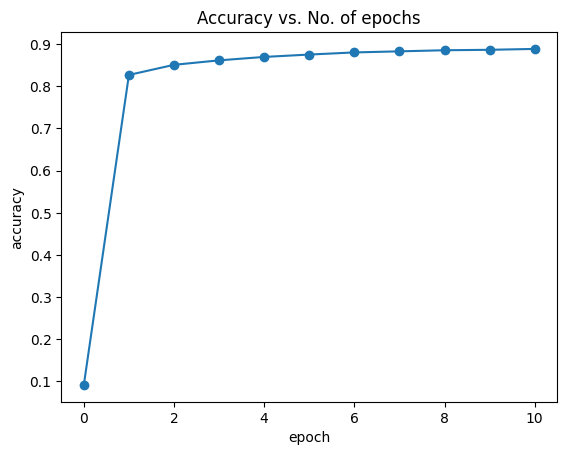

In [32]:
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]

plt.plot(accuracies,"-o")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs. No. of epochs");

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also good idea to look at model's result on some sample images. Let's test out our model with some images from the predefined test dataset of 10,000 images.

Shape : torch.Size([1, 28, 28])
Label : 7


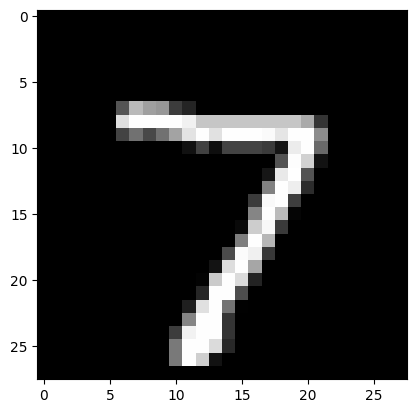

In [33]:
img, label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print(f'Shape : {img.shape}')
print(f'Label : {label}')

Let's define a helper function `predict_image`, which returns the predicted lavel for a single image tensor

In [34]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb,dim=1)

    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the beginnign of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images

Label : 7, predicted : 7


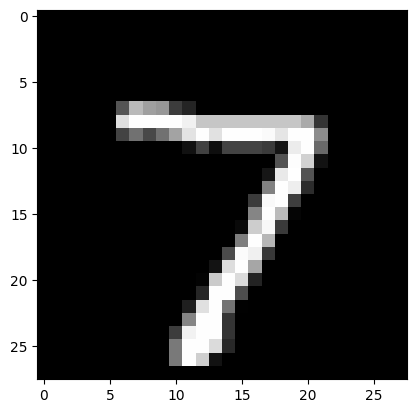

In [35]:
img, label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print(f'Label : {label}, predicted : {predict_image(img,model)}')

Label : 0, predicted : 0


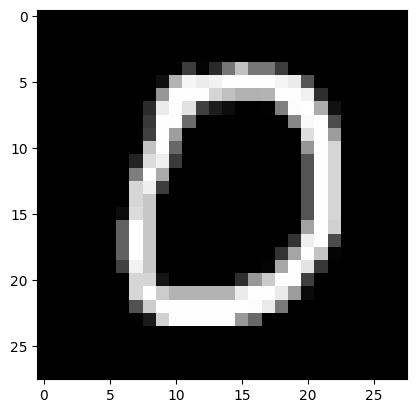

In [36]:
img, label = test_dataset[10]
plt.imshow(img[0],cmap='gray')
print(f'Label : {label}, predicted : {predict_image(img,model)}')

Label : 9, predicted : 4


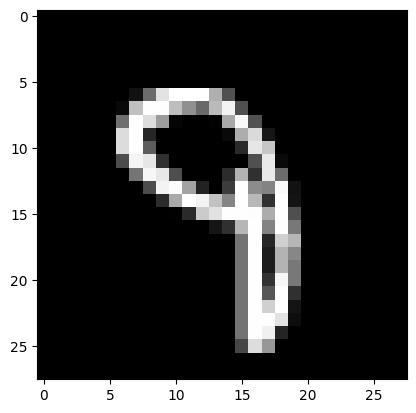

In [37]:
img, label = test_dataset[193]
plt.imshow(img[0],cmap='gray')
print(f'Label : {label}, predicted : {predict_image(img,model)}')

Label : 2, predicted : 8


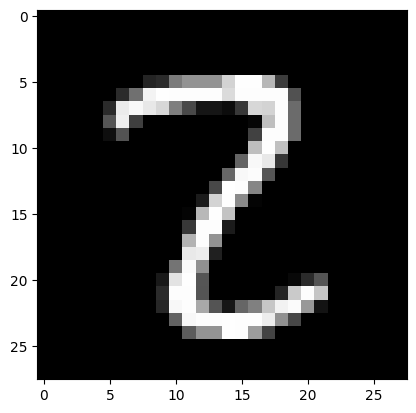

In [38]:
img, label = test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print(f'Label : {label}, predicted : {predict_image(img,model)}')

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hyperparameters.

As a final step. Let's also look at the overall loss and accuracy of the model on the test set


In [39]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.3910861909389496, 'val_acc': 0.89599609375}

## Saving and loading the model

Since we've trained our model for a long time and achieved a reasonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later to avoid retraining from scartch.

In [40]:
torch.save(model.state_dict(),'models/mnist-logistic.pth')

The `.state_dict()` method returns an  `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model

In [41]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0118, -0.0172, -0.0014,  ...,  0.0185,  0.0304, -0.0231],
                      [ 0.0145,  0.0355,  0.0185,  ...,  0.0125,  0.0130,  0.0077],
                      [-0.0297, -0.0225,  0.0319,  ..., -0.0053,  0.0129,  0.0273],
                      ...,
                      [-0.0296,  0.0180,  0.0113,  ...,  0.0096, -0.0260, -0.0065],
                      [ 0.0259,  0.0091,  0.0159,  ..., -0.0205,  0.0305, -0.0074],
                      [-0.0325, -0.0336, -0.0098,  ...,  0.0161, -0.0020,  0.0085]])),
             ('linear.bias',
              tensor([-0.1043,  0.1641, -0.0096, -0.0773,  0.0704,  0.1829, -0.0483,  0.1119,
                      -0.2989, -0.0671]))])

To load the model weights, we can instante a new obhect of the class `MnistModel`, and use the `.load_state_dict` method

In [42]:
model2 = MnistModel()
model2.load_state_dict(torch.load('models/mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0118, -0.0172, -0.0014,  ...,  0.0185,  0.0304, -0.0231],
                      [ 0.0145,  0.0355,  0.0185,  ...,  0.0125,  0.0130,  0.0077],
                      [-0.0297, -0.0225,  0.0319,  ..., -0.0053,  0.0129,  0.0273],
                      ...,
                      [-0.0296,  0.0180,  0.0113,  ...,  0.0096, -0.0260, -0.0065],
                      [ 0.0259,  0.0091,  0.0159,  ..., -0.0205,  0.0305, -0.0074],
                      [-0.0325, -0.0336, -0.0098,  ...,  0.0161, -0.0020,  0.0085]])),
             ('linear.bias',
              tensor([-0.1043,  0.1641, -0.0096, -0.0773,  0.0704,  0.1829, -0.0483,  0.1119,
                      -0.2989, -0.0671]))])

In [43]:
test_loader = DataLoader(test_dataset, batch_size=512)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.39984238147735596, 'val_acc': 0.89453125}